In [1]:
import laser_measurement.measurement as measurement
import monitor.monitor as monitor
import threading
import time

# 串口参数
port = '/dev/ttyUSB0'  # 串口设备路径

# 打开串口
ser = measurement.measure(port) 
monitor = monitor.monitor()

#初始化激光器
ser.init_write(20)
ser.mode = "singgel"

def mov():
    while 1:
        monitor.del_move_x()
        # monitor.get_position()
        time.sleep(1/20)
        # t2.join()
    
def measure():
    while 1:
        ser.read_serial()
        time.sleep(1/20)
        # t1.join()
        
# 创建线程
t1=threading.Thread(target=mov,daemon=True)
t2=threading.Thread(target=measure,daemon=True)

t1.start()
t2.start()
t2.join()
t1.join()
erro = monitor.DAQdll.CloseUSB_2XE()
ser.stop_serial()



TypeError: measure.init_write() takes 1 positional argument but 2 were given

In [2]:
a=[1,2,3]
a.pop(0)
a

[2, 3]

In [18]:
x=['D=1.814m\r\n', 'D=1.810m\r\n', 'D=1.807m\r\n', 'D=1.811m\r\n', 'D=1.802m\r\n', 'D=1.805m\r\n', 'D=1.810m\r\n', 'D=1.810m\r\n', 'D=1.810m\r\n', 'D=1.811m\r\n', 'D=1.814m\r\n', 'D=1.815m\r\n', 'D=1.817m\r\n', 'D=1.817m\r\n', 'D=1.817m\r\n', 'STOP\r\n', 'OK\r\n', 'STOP\r\n', 'OK\r\n', 'D=1.797m\r\n', 'D=1.801m\r\n', 'D=1.801m\r\n', 'D=1.801m\r\n', 'D=1.812m\r\n', 'D=1.805m\r\n', 'D=1.810m\r\n', 'D=1.806m\r\n', 'D=1.816m\r\n', 'D=1.819m\r\n', 'D=1.813m\r\n', 'D=1.813m\r\n', 'D=1.813m\r\n', 'D=1.821m\r\n', 'D=1.818m\r\n', 'STOP\r\n', 'OK\r\n', 'STOP\r\n', 'OK\r\n', 'D=1.794m\r\n', 'D=1.805m\r\n', 'D=1.802m\r\n', 'D=1.799m\r\n', 'D=1.808m\r\n', 'D=1.807m\r\n', 'D=1.813m\r\n', 'D=1.811m\r\n', 'D=1.815m\r\n', 'D=1.815m\r\n', 'D=1.811m\r\n', 'D=1.823m\r\n', 'D=1.828m\r\n', 'D=1.828m\r\n', 'D=1.826m\r\n']

lst = [[]]
x_len=len(x)
line_num=0
for i in range(x_len):
    if x:
        a=x.pop(0)
        # print(a,line_num)
        lst[line_num].append(a)
        if a=='OK\r\n' and x[1][0]=="D":
            line_num+=1
            lst.append([])

[['D=1.814m\r\n', 'D=1.810m\r\n', 'D=1.807m\r\n', 'D=1.811m\r\n', 'D=1.802m\r\n', 'D=1.805m\r\n', 'D=1.810m\r\n', 'D=1.810m\r\n', 'D=1.810m\r\n', 'D=1.811m\r\n', 'D=1.814m\r\n', 'D=1.815m\r\n', 'D=1.817m\r\n', 'D=1.817m\r\n', 'D=1.817m\r\n', 'STOP\r\n', 'OK\r\n', 'STOP\r\n', 'OK\r\n'], ['D=1.797m\r\n', 'D=1.801m\r\n', 'D=1.801m\r\n', 'D=1.801m\r\n', 'D=1.812m\r\n', 'D=1.805m\r\n', 'D=1.810m\r\n', 'D=1.806m\r\n', 'D=1.816m\r\n', 'D=1.819m\r\n', 'D=1.813m\r\n', 'D=1.813m\r\n', 'D=1.813m\r\n', 'D=1.821m\r\n', 'D=1.818m\r\n', 'STOP\r\n', 'OK\r\n', 'STOP\r\n', 'OK\r\n'], ['D=1.794m\r\n', 'D=1.805m\r\n', 'D=1.802m\r\n', 'D=1.799m\r\n', 'D=1.808m\r\n', 'D=1.807m\r\n', 'D=1.813m\r\n', 'D=1.811m\r\n', 'D=1.815m\r\n', 'D=1.815m\r\n', 'D=1.811m\r\n', 'D=1.823m\r\n', 'D=1.828m\r\n', 'D=1.828m\r\n', 'D=1.826m\r\n']]


In [3]:
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Create 3D array
lst=[[[1.797, 1.797, 1.797, 1.797, 1.797, 1.797, 1.797, 1.797, 1.797, 1.797, 1.797, 1.797, 1.799, 1.799, 1.801, 1.801, 1.802, 1.802, 1.802, 1.803, 1.803, 1.804, 1.804, 1.804, 1.805, 1.805, 1.805, 1.805, 1.807, 1.807, 1.807, 1.808, 1.808, 1.809, 1.809, 1.811, 1.811, 1.811, 1.812, 1.812], [0.0, 0.02564102564102564, 0.05128205128205128, 0.07692307692307693, 0.10256410256410256, 0.1282051282051282, 0.15384615384615385, 0.1794871794871795, 0.20512820512820512, 0.23076923076923075, 0.2564102564102564, 0.28205128205128205, 0.3076923076923077, 0.3333333333333333, 0.358974358974359, 0.3846153846153846, 0.41025641025641024, 0.4358974358974359, 0.4615384615384615, 0.48717948717948717, 0.5128205128205128, 0.5384615384615384, 0.5641025641025641, 0.5897435897435898, 0.6153846153846154, 0.641025641025641, 0.6666666666666666, 0.6923076923076923, 0.717948717948718, 0.7435897435897436, 0.7692307692307692, 0.7948717948717948, 0.8205128205128205, 0.8461538461538461, 0.8717948717948718, 0.8974358974358974, 0.923076923076923, 0.9487179487179487, 0.9743589743589743, 1.0]], [[1.797, 1.797, 1.797, 1.797, 1.797, 1.797, 1.797, 1.797, 1.797, 1.798, 1.798, 1.798, 1.799, 1.799, 1.801, 1.801, 1.801, 1.801, 1.802, 1.802, 1.802, 1.803, 1.803, 1.803, 1.805, 1.805, 1.806, 1.806, 1.806, 1.806, 1.807, 1.807, 1.807, 1.807, 1.809, 1.811, 1.811, 1.812, 1.812, 1.812], [0.0, 0.02564102564102564, 0.05128205128205128, 0.07692307692307693, 0.10256410256410256, 0.1282051282051282, 0.15384615384615385, 0.1794871794871795, 0.20512820512820512, 0.23076923076923075, 0.2564102564102564, 0.28205128205128205, 0.3076923076923077, 0.3333333333333333, 0.358974358974359, 0.3846153846153846, 0.41025641025641024, 0.4358974358974359, 0.4615384615384615, 0.48717948717948717, 0.5128205128205128, 0.5384615384615384, 0.5641025641025641, 0.5897435897435898, 0.6153846153846154, 0.641025641025641, 0.6666666666666666, 0.6923076923076923, 0.717948717948718, 0.7435897435897436, 0.7692307692307692, 0.7948717948717948, 0.8205128205128205, 0.8461538461538461, 0.8717948717948718, 0.8974358974358974, 0.923076923076923, 0.9487179487179487, 0.9743589743589743, 1.0]], [[1.798, 1.798, 1.798, 1.798, 1.798, 1.798, 1.798, 1.798, 1.798, 1.798, 1.798, 1.799, 1.799, 1.8, 1.8, 1.8, 1.802, 1.802, 1.804, 1.804, 1.804, 1.804, 1.804, 1.804, 1.805, 1.805, 1.806, 1.806, 1.806, 1.808, 1.808, 1.81, 1.81, 1.81, 1.81, 1.811, 1.811, 1.812, 1.812, 1.812], [0.0, 0.02631578947368421, 0.05263157894736842, 0.07894736842105263, 0.10526315789473684, 0.13157894736842105, 0.15789473684210525, 0.18421052631578946, 0.21052631578947367, 0.23684210526315788, 0.2631578947368421, 0.2894736842105263, 0.3157894736842105, 0.3421052631578947, 0.3684210526315789, 0.39473684210526316, 0.42105263157894735, 0.4473684210526315, 0.47368421052631576, 0.47368421052631576, 0.5, 0.5263157894736842, 0.5526315789473684, 0.5789473684210527, 0.6052631578947368, 0.631578947368421, 0.6578947368421052, 0.6842105263157894, 0.7105263157894737, 0.7368421052631579, 0.763157894736842, 0.7894736842105263, 0.8157894736842105, 0.8421052631578947, 0.8684210526315789, 0.894736842105263, 0.9210526315789473, 0.9473684210526315, 0.9736842105263157, 1.0]]]
print(len(lst[1][1]))
max_datalen = len(max(lst[0],key=len))
for i in range(len(lst)):
    lst_len=len(lst[i][0])
    supplement_len = max_datalen - lst_len
    if supplement_len:
        split_len=int(lst_len/(supplement_len+1))
    
    for j in range(supplement_len):
        lst[i][0].insert(split_len*(j+1),lst[i][0][split_len*(j+1)-1])
        lst[i][1].insert(split_len*(j+1),lst[i][1][split_len*(j+1)-1])

print(len(lst[1][1]))

40
40


In [7]:
lst=[[[1.764, 1.766, 1.766, 1.772, 1.774, 1.774, 1.779, 1.774, 1.771, 1.781, 1.778, 1.778, 1.778, 1.781, 1.792, 1.782], [0.0, 0.06666666666666667, 0.13333333333333333, 0.2, 0.26666666666666666, 0.3333333333333333, 0.4, 0.4666666666666667, 0.5333333333333333, 0.6, 0.6666666666666666, 0.7333333333333333, 0.8, 0.8666666666666667, 0.9333333333333333, 1.0]], [[1.774, 1.772, 1.772, 1.772, 1.77, 1.77, 1.773, 1.773, 1.774, 1.778, 1.78, 1.778, 1.78, 1.78, 1.785, 1.785], [0.0, 0.07142857142857142, 0.14285714285714285, 0.21428571428571427, 0.2857142857142857, 0.3571428571428571, 0.42857142857142855, 0.42857142857142855, 0.5, 0.5714285714285714, 0.6428571428571428, 0.7142857142857142, 0.7857142857142857, 0.8571428571428571, 0.9285714285714285, 1.0]], [[1.774, 1.771, 1.77, 1.77, 1.77, 1.768, 1.772, 1.774, 1.774, 1.778, 1.773, 1.779, 1.779, 1.779, 1.783, 1.778], [0.0, 0.07692307692307693, 0.15384615384615385, 0.23076923076923078, 0.23076923076923078, 0.3076923076923077, 0.38461538461538464, 0.46153846153846156, 0.46153846153846156, 0.5384615384615385, 0.6153846153846154, 0.6923076923076923, 0.7692307692307693, 0.8461538461538463, 0.9230769230769231, 1.0]]]
print(len(lst[2][0]))

16


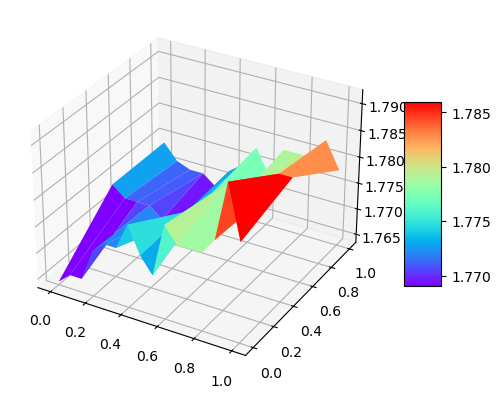

In [8]:
# data = np.array(lst)
# # Convert each 2D matrix into a Pandas DataFrame
# dfs = [pd.DataFrame(x) for x in data]
# # Create MultiIndex with 3 levels
# indices = pd.MultiIndex.from_product([range(s) for s in data.shape])
# # Concatenate all Pandas DataFrames into one large DataFrame
# df_final = pd.concat(dfs, keys=indices)

fig = plt.figure()
X = np.array([lst[i][1] for i in range(len(lst))])
y = np.linspace(0,1,len(lst))
_,Y = np.meshgrid(X[0],y)
# lst = np.array([lst[i][1] for i in range(len(lst))])
lst = np.array([lst[i][0] for i in range(len(lst))])
ax = fig.add_subplot(1,1,1,projection = "3d")
# ax.plot_wireframe(X,Y,lst,rcount = 15,ccount = 15) 
surf = ax.plot_surface(X,Y,lst,cmap='rainbow')
ax.contour(X,Y,lst,offset=-2, cmap = 'rainbow')#绘制等高线
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

In [146]:
import pyqtgraph.examples
pyqtgraph.examples.run()

[[-5.  0.  5.]
 [-5.  0.  5.]] [[-5. -5. -5.]
 [ 5.  5.  5.]] [[ 0.70886129 -0.95892427  0.70886129]
 [ 0.70886129 -0.95892427  0.70886129]]


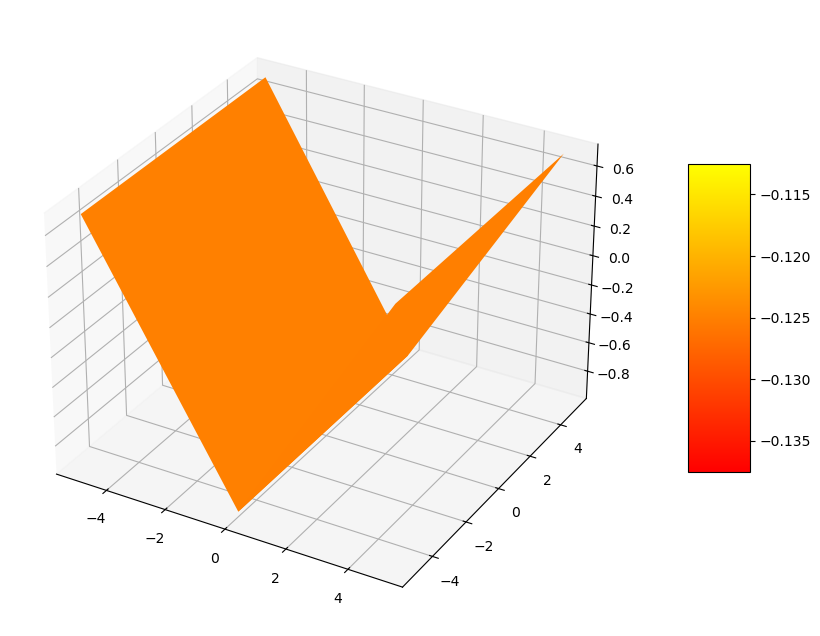

In [45]:
# ****************** 3d图中绘制曲面图 ******************
# 在3d坐标轴对象下使用plot_surface方法
from mpl_toolkits.mplot3d import axes3d # Axes3D写作axes3d也可以
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
fig = plt.figure(figsize=(16,8))
ax1 = fig.add_subplot(1,1,1,projection = "3d")
x = np.linspace(-5,5,3)
y = np.linspace(-5,5,2)
X,Y = np.meshgrid(x,y) # X和Y需要是二维数组
Z = np.sin(np.sqrt(X**2+Y**2))
print(X,Y,Z)
surf = ax1.plot_surface(X, Y, Z, cmap=cm.autumn)
"""
其余参数：
rcount:为沿行方向绘制网格的数目
ccount:为沿列方向绘制网格的数目
cmap:设定配色板（可直接调用matplotlib.cm中的配色板，如autumn,autumn_r，coolwarm等等）
color:设定颜色

"""

fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()


In [2]:
import laser_measurement.measurement as measurement
port = '/dev/ttyUSB0'  # 串口设备路径

# 打开串口
ser = measurement.measure(port)

# 初始化激光器
ser.init_write()
ser.mode = "fast auto"
ser.write_serial()


OK


In [3]:
ser.stop_auto()

In [4]:
ser.write_serial()

In [5]:
ser.stop_auto()